In [1]:
from numpy.polynomial import polynomial as P

import data_catalog
import tseries_mod
from utils import copy_var_names, time_year_plus_frac
from utils_plot import plot_1var

%matplotlib inline

In [2]:
data_catalog.set_catalog('experiments')

active catalog: experiments


In [3]:
varnames = ['SFCO2', 'SFCO2_LND', 'SFCO2_OCN']
cum_varnames = {'SFCO2': 'SFCO2_CUM', 'SFCO2_LND': 'SFCO2_LND_CUM', 'SFCO2_OCN': 'SFCO2_OCN_CUM'}
drop_varnames = copy_var_names('atm')

In [4]:
def gen_ds_ann(experiment, legend, stream='cam.h0'):
    ds_ann = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, stream=stream, freq='ann')
    ds_ann.attrs['legend'] = legend

    # add cummulate flux vars
    for varname, cum_varname in cum_varnames.items():
        da = ds_ann[varname].cumsum(dim='time', keep_attrs=True)
        da.attrs['units'] = 'Pg'
        ds_ann[cum_varname] = da

    return ds_ann

In [5]:
ds_ann_dict = {}

In [6]:
experiment = 'piControl-cmip5' 
ds_ann_dict[experiment] = gen_ds_ann(experiment, 'piControl CESM1', 'cam2.h0')

In [7]:
experiment = 'esm-piControl-cmip5'
ds_ann_dict[experiment] = gen_ds_ann(experiment, 'esm-piControl CESM1', 'cam2.h0')

In [8]:
experiment = 'piControl'
ds_ann_dict[experiment] = gen_ds_ann(experiment, 'piControl CESM2')

In [9]:
experiment = 'esm-piControl-pre'
ds_ann_dict[experiment] = gen_ds_ann(experiment, 'esm-piControl-pre CESM2')

In [10]:
experiment = 'esm-piControl'
ds_ann_dict[experiment] = gen_ds_ann(experiment, 'esm-piControl CESM2')

In [11]:
experiment = 'piControl-2deg'
ds_ann_dict[experiment] = gen_ds_ann(experiment, 'piControl CESM2 2deg')

In [12]:
def plot_cum_vars(expr_list):
    ds_list = [ds_ann_dict[expr] for expr in expr_list]
    legend_list = [ds.attrs['legend'] for ds in ds_list]
    for cum_varname in cum_varnames.values():
        plot_1var(cum_varname, ds_list, legend_list, cum_varname, region_val='Global')

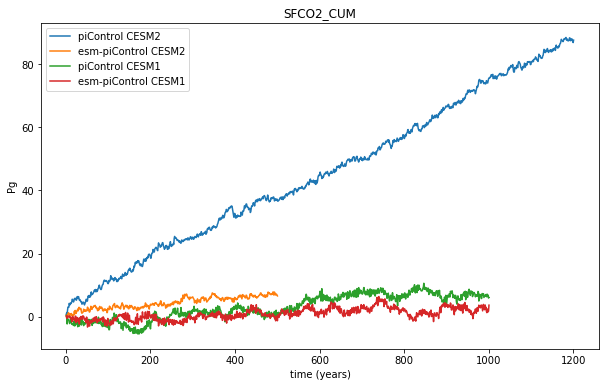

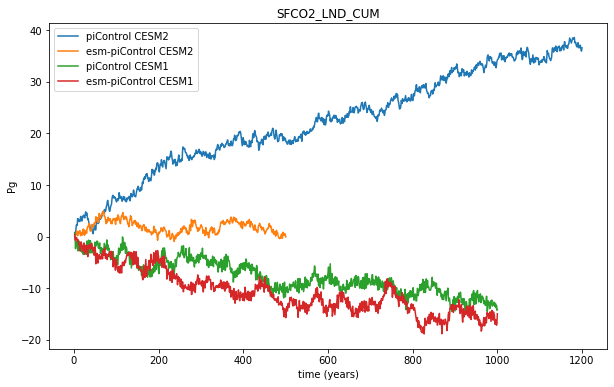

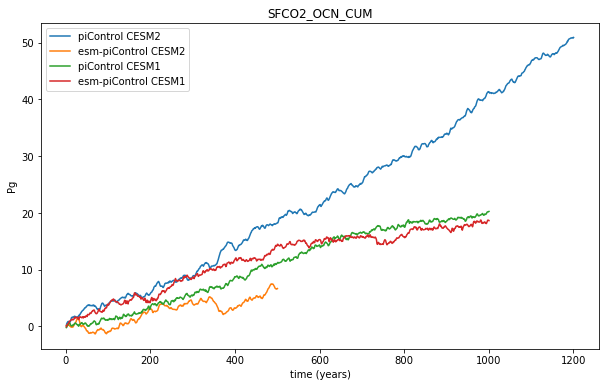

In [13]:
plot_cum_vars(['piControl', 'esm-piControl', 'piControl-cmip5', 'esm-piControl-cmip5'])

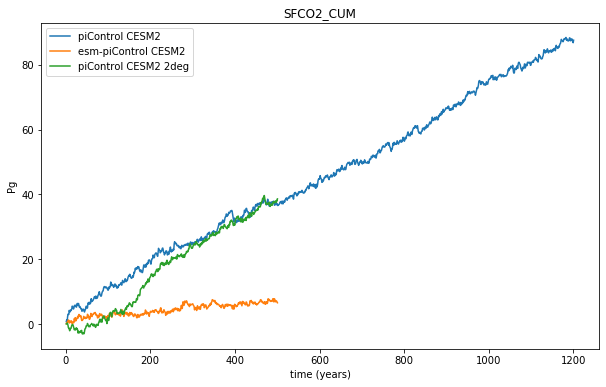

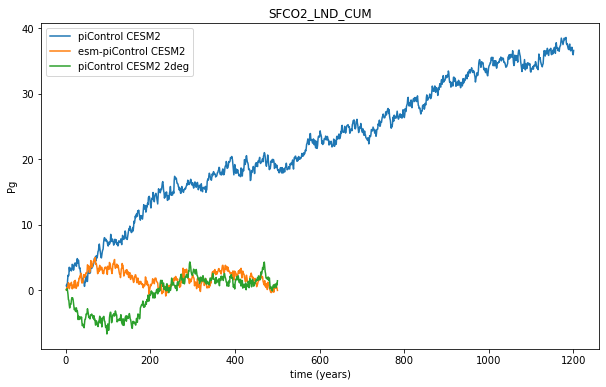

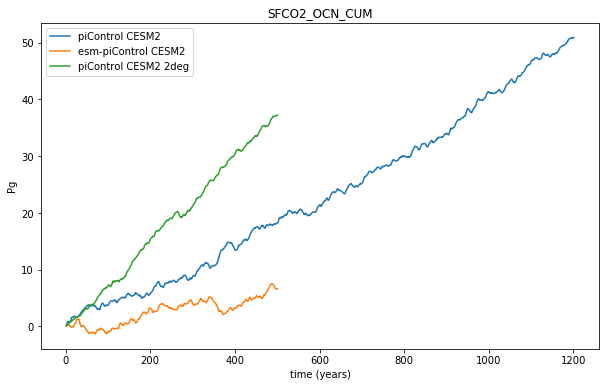

In [14]:
plot_cum_vars(['piControl', 'esm-piControl', 'piControl-2deg'])

In [15]:
def polyfit_summary(t, y):
    pf0, stats0 = P.polyfit(t, y, 0, full=True)
    pf1, stats1 = P.polyfit(t, y, 1, full=True)
    mean = pf0[0]
    slope = pf1[1]
    var_expl = 1.0 - stats1[0][0] / stats0[0][0]
    print(f'    mean={mean}, slope={slope}, variance explained={var_expl}')

def comp_cum_vartrend(experiment):
    ds_ann = ds_ann_dict[experiment]
    t = time_year_plus_frac(ds_ann, 'time')
    print(' '.join([experiment, str(len(t))]))
    for cum_varname in cum_varnames.values():
        y = ds_ann[cum_varname].sel(region='Global').values
        print(f'summary for {cum_varname}')
        polyfit_summary(t, y)

In [16]:
for experiment in ds_ann_dict:
    comp_cum_vartrend(experiment)

piControl-cmip5 1000
summary for SFCO2_CUM
    mean=3.0606423657611037, slope=0.012155611123665193, variance explained=0.8124445432106598
summary for SFCO2_LND_CUM
    mean=-7.654694652050735, slope=-0.01051825336702595, variance explained=0.8196430613700475
summary for SFCO2_OCN_CUM
    mean=10.71533526860923, slope=0.02267385996800836, variance explained=0.9807224363914027
esm-piControl-cmip5 1000
summary for SFCO2_CUM
    mean=0.9573278488218787, slope=0.004300320073027238, variance explained=0.4833129076030386
summary for SFCO2_LND_CUM
    mean=-10.692817985370759, slope=-0.01327660751935212, variance explained=0.8049300293701591
summary for SFCO2_OCN_CUM
    mean=11.650148669464514, slope=0.01757694837021673, variance explained=0.9280817381666508
piControl 1200
summary for SFCO2_CUM
    mean=45.50252733394503, slope=0.06933243390983858, variance explained=0.9955641500510316
summary for SFCO2_LND_CUM
    mean=22.38282326524457, slope=0.02765437291355152, variance explained=0.967062